# SINGAPORE PUBLIC HOUSING (HDB) RESALE PRICE PREDICTION

In [2]:
import os
import pandas as pd
import numpy as np

Download raw data from:

https://data.gov.sg/dataset/resale-flat-prices

https://data.gov.sg/dataset/hdb-resale-price-index


In [3]:
# List all files in raw_data directory
!dir raw_data\


 Volume in drive C has no label.
 Volume Serial Number is 4C22-B1CB

 Directory of C:\Users\user\Documents\Python Scripts\raw_data

11/15/2019  12:47 PM    <DIR>          .
11/15/2019  12:47 PM    <DIR>          ..
11/05/2019  03:31 PM             1,684 hdb_price_index.csv
11/05/2019  03:31 PM             2,501 metadata-hdb-resale-price-index.txt
11/05/2019  03:05 PM            13,208 metadata-resale-flat-prices.txt
11/05/2019  03:05 PM        22,923,132 resale-flat-prices-based-on-approval-date-1990-1999.csv
11/05/2019  03:05 PM        29,739,597 resale-flat-prices-based-on-approval-date-2000-feb-2012.csv
11/05/2019  03:05 PM         3,108,078 resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv
11/05/2019  03:05 PM         5,555,610 resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv
11/05/2019  03:05 PM         4,212,975 resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv
               8 File(s)     65,556,785 bytes

In [31]:
# CREATE A LIST CONTAINING THE CSV FILE NAMES:

# Set destination of folder containing raw data
file_loc = 'raw_data/'
# This variable will contain every file in folder
file_list = os.listdir(file_loc)
# This variable only bothers with files ending with '.csv'
file_list_csv = [i for i in file_list if i.endswith('.csv')]
del(file_list_csv[0])
print(file_list_csv)


['resale-flat-prices-based-on-approval-date-1990-1999.csv', 'resale-flat-prices-based-on-approval-date-2000-feb-2012.csv', 'resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv', 'resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv', 'resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv']


In [32]:
# CREATE A FUNCTION TO LOAD THE DATA FROM THE LIST OF CSV FILES INTO ONE PANDAS DATFRAME:

def CombineDF(file_loc, file_list):
    
    dataset_files = []
    
    for i in file_list:
        dataset_files.append('{}{}'.format(file_loc, i))
        
    frames = [pd.read_csv(f) for f in list(dataset_files)]
    
    # Combine all the pandas dataframes
    
    combi_result = pd.concat(frames, ignore_index=True, sort=True).fillna(0)
    
    return combi_result


In [33]:
# Utilise the newly created functions:
hdb_combi_df = CombineDF(file_loc, file_list_csv)


In [34]:
# Inspect first 5 observations of hdb_combi_df:
hdb_combi_df.head()


,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,309,IMPROVED,1 ROOM,31.0,1977,1990-01,0,9000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO
1,309,IMPROVED,1 ROOM,31.0,1977,1990-01,0,6000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO
2,309,IMPROVED,1 ROOM,31.0,1977,1990-01,0,8000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO
3,309,IMPROVED,1 ROOM,31.0,1977,1990-01,0,6000.0,07 TO 09,ANG MO KIO AVE 1,ANG MO KIO
4,216,NEW GENERATION,3 ROOM,73.0,1976,1990-01,0,47200.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO


In [35]:
# LOAD QUARTERLY PRICE INDEX

hdb_priceIndex_df = pd.read_csv("raw_data/hdb_price_index.csv")

print(hdb_priceIndex_df.head())
print(hdb_priceIndex_df.tail())


   quarter  index
0  1990-Q1   24.3
1  1990-Q2   24.4
2  1990-Q3   25.0
3  1990-Q4   24.7
4  1991-Q1   24.9
     quarter  index
113  2018-Q2  131.7
114  2018-Q3  131.6
115  2018-Q4  131.4
116  2019-Q1  131.0
117  2019-Q2  130.8


In [36]:
# USE "QUARTER" INFORMATION AS DATAFRAME INDEX

hdb_priceIndex_df = hdb_priceIndex_df.set_index(pd.to_datetime(hdb_priceIndex_df["quarter"]))

del hdb_priceIndex_df['quarter']
hdb_priceIndex_df.head()

,index
quarter,
1990-01-01,24.3
1990-04-01,24.4
1990-07-01,25.0
1990-10-01,24.7
1991-01-01,24.9


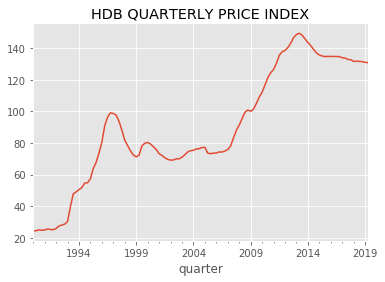

In [37]:
# DISPLAY QUARTERLY PRICE INDEX ON GGPLOT

import matplotlib.pyplot as plt

plt.style.use('ggplot')

hdb_priceIndex_df["index"].plot()
plt.title("HDB QUARTERLY PRICE INDEX")
plt.show()


In [38]:
# Check column names in dataframe
hdb_combi_df.columns

Index(['block', 'flat_model', 'flat_type', 'floor_area_sqm',
       'lease_commence_date', 'month', 'remaining_lease', 'resale_price',
       'storey_range', 'street_name', 'town'],
      dtype='object')

In [39]:
# Look at flat model options
hdb_combi_df["flat_model"].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'Type S1', 'Type S2',
       'DBSS', 'Premium Apartment Loft'], dtype=object)

In [40]:
hdb_combi_df["flat_model"].str.lower().unique()

array(['improved', 'new generation', 'model a', 'standard', 'simplified',
       'model a-maisonette', 'apartment', 'maisonette', 'terrace',
       '2-room', 'improved-maisonette', 'multi generation',
       'premium apartment', 'adjoined flat', 'premium maisonette',
       'model a2', 'type s1', 'type s2', 'dbss', 'premium apartment loft'],
      dtype=object)

In [41]:
# Replace "flat model" with lowercase values
hdb_combi_df["flat_model"] = hdb_combi_df["flat_model"].str.lower()

In [42]:
# the number of different flat models has been reduced from 35 to 20: 
len(hdb_combi_df["flat_model"].unique())

20

In [43]:
# Convert flat model into categorical data: 
hdb_combi_df["flat_model"] = hdb_combi_df["flat_model"].astype("category")

In [44]:
# Check data types
hdb_combi_df.dtypes

block                    object
flat_model             category
flat_type                object
floor_area_sqm          float64
lease_commence_date       int64
month                    object
remaining_lease          object
resale_price            float64
storey_range             object
street_name              object
town                     object
dtype: object

In [45]:
# Check values of flat types
hdb_combi_df["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [46]:
# Replace "multi-generation" with "mutli generation"
mask = hdb_combi_df.flat_type == "MULTI-GENERATION"
column_name = "flat_type"
hdb_combi_df.loc[mask, column_name] = "MULTI GENERATION"

# Check values of flat types
hdb_combi_df["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [47]:
# Convert flat model into categorical data:
hdb_combi_df["flat_type"] = hdb_combi_df["flat_type"].astype("category")
hdb_combi_df["storey_range"] = hdb_combi_df["storey_range"].astype("category")
hdb_combi_df["town"] = hdb_combi_df["town"].astype("category")
hdb_combi_df.dtypes

block                    object
flat_model             category
flat_type              category
floor_area_sqm          float64
lease_commence_date       int64
month                    object
remaining_lease          object
resale_price            float64
storey_range           category
street_name              object
town                   category
dtype: object

In [48]:
hdb_combi_df.head(2)

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,309,improved,1 ROOM,31.0,1977,1990-01,0,9000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO
1,309,improved,1 ROOM,31.0,1977,1990-01,0,6000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO


In [49]:
df_kim_pong = hdb_combi_df[hdb_combi_df["street_name"].str.contains('KIM PONG', na=False)]
df_kim_pong = df_kim_pong.set_index("month")
pd.to_datetime(df_kim_pong.index)
df_kim_pong = df_kim_pong.sort_index()
df_kim_pong.tail(3)

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,storey_range,street_name,town
month,,,,,,,,,,
2017-07,49,standard,3 ROOM,88.0,1973,54 years 06 months,618000.0,01 TO 03,KIM PONG RD,BUKIT MERAH
2017-07,49,standard,3 ROOM,88.0,1973,54 years 07 months,650000.0,01 TO 03,KIM PONG RD,BUKIT MERAH
2019-05,38,standard,3 ROOM,88.0,1974,53 years 08 months,638000.0,01 TO 03,KIM PONG RD,BUKIT MERAH


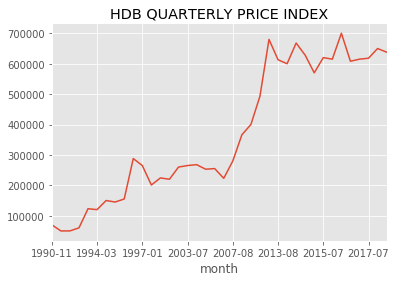

In [50]:

df_kim_pong["resale_price"].plot()
plt.title("HDB QUARTERLY PRICE INDEX")
plt.show()


In [52]:
# Export transformed data to new .csv file

hdb_combi_df.to_csv("interim/sg-resale-flat-prices-1990-to-2019-jan.csv", index = False)
